In [17]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 
from matplotlib import dates as mpl_dates
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import folium


In [18]:
# Importing the dataset
df = pd.read_csv('forbes_celebrity_100.csv')
df

,Name,Pay (USD millions),Year,Category
0,Oprah Winfrey,225.0,2005,Personalities
1,Tiger Woods,87.0,2005,Athletes
2,Mel Gibson,185.0,2005,Actors
3,George Lucas,290.0,2005,Directors/Producers
4,Shaquille O'Neal,33.4,2005,Athletes
...,...,...,...,...
1642,Kiss,36.5,2020,Musicians
1643,Sebastian Vettel,36.3,2020,Athletes
1644,Serena Williams,36.0,2020,Athletes
1645,Angelina Jolie,35.5,2020,Actresses


In [19]:
# Descriptive statistics
df.describe()

,Pay (USD millions),Year
count,1647.000000,1647.000000
mean,47.063995,2012.633880
std,40.439071,4.616274
min,1.500000,2005.000000
25%,27.250000,2009.000000
50%,40.000000,2013.000000
75%,56.000000,2017.000000
max,620.000000,2020.000000


In [20]:
# Dre got the maximum pay of 620 millions USD in 2014 
df[df['Pay (USD millions)'] == 620]

,Name,Pay (USD millions),Year,Category
902,Dr. Dre,620.0,2014,Musicians


In [21]:
# Replacing each occurrence of pattern/regex in the Series/Index using str.replace
df.columns = df.columns.str.replace(r'\n','', regex=True)
df.columns

Index(['Name', 'Pay (USD millions)', 'Year', 'Category'], dtype='object')

In [22]:
# Grouping different categories according to maximum pay
df1 = df.groupby('Category')['Pay (USD millions)'].max()
df1

Category
Actors                  239.0
Actresses                56.0
Athletes                300.0
Authors                 300.0
Comedians               100.0
Directors/Producers     332.0
Hip-hop impresario       31.0
Magicians                64.0
Models                   47.0
Musicians               620.0
Personalities           590.0
Television actors        52.0
Television actresses     43.0
Name: Pay (USD millions), dtype: float64

<AxesSubplot:xlabel='Category'>

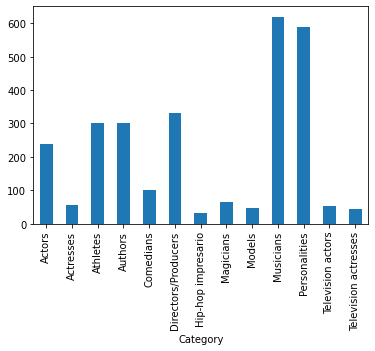

In [23]:
#Simple bar plot indicating different categories using matplotlib
df1.plot.bar()

In [26]:
# Indexing to get a specific row which is Athletes
At = (df.loc[df['Category'] == 'Athletes'])
At

,Name,Pay (USD millions),Year,Category
1,Tiger Woods,87.0,2005,Athletes
4,Shaquille O'Neal,33.4,2005,Athletes
14,Lance Armstrong,28.0,2005,Athletes
15,Michael Jordan,33.0,2005,Athletes
16,Michael Schumacher,60.0,2005,Athletes
...,...,...,...,...
1637,Canelo Alvarez,37.0,2020,Athletes
1638,Damian Lillard,37.0,2020,Athletes
1643,Sebastian Vettel,36.3,2020,Athletes
1644,Serena Williams,36.0,2020,Athletes


In [27]:
#Grouping athletes in according to their maximum salary
At1 = At.groupby('Name')['Pay (USD millions)'].max()
At1

Name
A.J. Green            33.5
Aaron Donald          41.4
Aaron Rodgers         89.3
Alex Rodriguez        36.0
Alex Smith            41.4
                      ... 
Valentino Rossi       30.0
Venus Williams        15.5
Von Miller            35.1
Walter Jones          23.2
Zlatan Ibrahimovic    39.0
Name: Pay (USD millions), Length: 113, dtype: float64

In [29]:
# Indexing to get a specific row which is Musicians
M = (df.loc[df['Category'] == 'Musicians'])
M

,Name,Pay (USD millions),Year,Category
7,Madonna,50.0,2005,Musicians
8,Elton John,44.0,2005,Musicians
19,Sean (Diddy) Combs,36.0,2005,Musicians
22,Metallica,37.4,2005,Musicians
23,Jennifer Lopez,17.0,2005,Musicians
...,...,...,...,...
1634,Bon Jovi,38.0,2020,Musicians
1635,U2,38.0,2020,Musicians
1639,Paul McCartney,37.0,2020,Musicians
1641,DJ Khaled,36.5,2020,Musicians


In [31]:
# Indexing to get a specific row containing Athletes with salaries in 2020
D = (df.loc[df['Category'] == 'Athletes'])
D2 = D[D['Year'] == 2020]
D2

,Name,Pay (USD millions),Year,Category
1549,Roger Federer,106.3,2020,Athletes
1550,Cristiano Ronaldo,105.0,2020,Athletes
1551,Lionel Messi,104.0,2020,Athletes
1553,Neymar,95.5,2020,Athletes
1555,LeBron James,88.2,2020,Athletes
1562,Stephen Curry,74.4,2020,Athletes
1570,Kevin Durant,63.9,2020,Athletes
1572,Tiger Woods,62.3,2020,Athletes
1573,Kirk Cousins,60.5,2020,Athletes
1577,Carson Wentz,59.1,2020,Athletes


In [36]:
# List of top 10 highest earning athletes in 2020
sorted_D2 = D2.sort_values('Pay (USD millions)', ascending= False).reset_index().head(10)
sorted_D2

,index,Name,Pay (USD millions),Year,Category
0,1549,Roger Federer,106.3,2020,Athletes
1,1550,Cristiano Ronaldo,105.0,2020,Athletes
2,1551,Lionel Messi,104.0,2020,Athletes
3,1553,Neymar,95.5,2020,Athletes
4,1555,LeBron James,88.2,2020,Athletes
5,1562,Stephen Curry,74.4,2020,Athletes
6,1570,Kevin Durant,63.9,2020,Athletes
7,1572,Tiger Woods,62.3,2020,Athletes
8,1573,Kirk Cousins,60.5,2020,Athletes
9,1577,Carson Wentz,59.1,2020,Athletes


In [38]:
# Scatter plot of top 10 highest earning athletes in 2020
fig = px.scatter(sorted_D2,  x='Name', y='Pay (USD millions)', size='Pay (USD millions)', 
                 color='Name', hover_name='Name', size_max=50)
fig.update_layout(title_text='Top 10 highest paid athletes 2020'
            
)

fig.update_layout(
    annotations=[
        dict(
            x=-0.06,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

fig.show()



In [39]:
# Bar plot of top 10 highest earning athletes in 2020
fig = px.bar(
    sorted_D2,
    x = "Name",
    y = "Pay (USD millions)",
    title= "Top 10 highest paid athletes 2020",
   color_discrete_sequence=["red"], 
    height=550,
    width=850,
    text='Pay (USD millions)'

)
fig.update_traces(texttemplate='%{text:.2.5s}', textposition='outside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')


fig.update_layout(
    annotations=[
        dict(
            x=-0.1,
            y=-0.25,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)


fig.update_xaxes(title_text="Name of Athlete")

fig.update_yaxes(title_text="Pay (USD millions)")

fig.show()



In [40]:
# Indexing to get a specific row containing Cristiano Ronaldo
Cr = (df.loc[df['Name'] == 'Cristiano Ronaldo'])
Cr

,Name,Pay (USD millions),Year,Category
547,Cristiano Ronaldo,36.0,2010,Athletes
642,Cristiano Ronaldo,38.0,2011,Athletes
743,Cristiano Ronaldo,42.0,2012,Athletes
830,Cristiano Ronaldo,44.0,2013,Athletes
929,Cristiano Ronaldo,80.0,2014,Athletes
1006,Cristiano Ronaldo,79.5,2015,Athletes
1111,Cristiano Ronaldo,88.0,2016,Athletes
1221,Cristiano Ronaldo,93.0,2017,Athletes
1336,Cristiano Ronaldo,108.0,2018,Athletes
1442,Cristiano Ronaldo,109.0,2019,Athletes


In [42]:
# Summary statistics of Cristiano Ronaldo Salary
Cr.describe()

,Pay (USD millions),Year
count,11.000000,11.000000
mean,74.772727,2015.000000
std,29.364403,3.316625
min,36.000000,2010.000000
25%,43.000000,2012.500000
50%,80.000000,2015.000000
75%,99.000000,2017.500000
max,109.000000,2020.000000


In [44]:
# Year wise Cristiano Ronaldo Salary from 2010 to 2020
Cr1 = Cr.groupby('Year')['Pay (USD millions)'].max().reset_index()
Cr1

,Year,Pay (USD millions)
0,2010,36.0
1,2011,38.0
2,2012,42.0
3,2013,44.0
4,2014,80.0
5,2015,79.5
6,2016,88.0
7,2017,93.0
8,2018,108.0
9,2019,109.0


In [54]:
# Renaming the column (Pay by CR7)
Cr1 = Cr1.rename(columns={'Pay (USD millions)': 'CR7'})
Cr1

,Year,CR7
0,2010,36.0
1,2011,38.0
2,2012,42.0
3,2013,44.0
4,2014,80.0
5,2015,79.5
6,2016,88.0
7,2017,93.0
8,2018,108.0
9,2019,109.0


In [56]:
 # Reseting the index. This will create index starting from 0 and remove if there is any column set as index
Cr2 = Cr1.set_index('Year').reset_index()
Cr2

,Year,CR7
0,2010,36.0
1,2011,38.0
2,2012,42.0
3,2013,44.0
4,2014,80.0
5,2015,79.5
6,2016,88.0
7,2017,93.0
8,2018,108.0
9,2019,109.0


In [57]:
# Bar plot of Cristiano Ronaldo earing from 2010 to 2020
fig = px.bar(
    Cr2,
    x = "Year",
    y = "CR7",
    title= "CR7 Earnings",
    text='CR7',
   color_discrete_sequence=["black"], 
    height=500,
    width=800)

fig.update_traces(texttemplate='%{text:.2.5s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


fig.update_layout(
    annotations=[
        dict(
            x=-0.1,
            y=-0.2,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

fig.update_xaxes(title_text="Year")

fig.update_yaxes(title_text="Pay (USD millions)")
fig.show()


In [58]:
# Indexing to get a specific row containing Lional Messi
Lm = (df.loc[df['Name'] == 'Lionel Messi'])
Lm

,Name,Pay (USD millions),Year,Category
661,Lionel Messi,32.0,2011,Athletes
749,Lionel Messi,39.0,2012,Athletes
838,Lionel Messi,41.0,2013,Athletes
945,Lionel Messi,65.0,2014,Athletes
1009,Lionel Messi,74.0,2015,Athletes
1114,Lionel Messi,81.5,2016,Athletes
1230,Lionel Messi,80.0,2017,Athletes
1334,Lionel Messi,111.0,2018,Athletes
1440,Lionel Messi,127.0,2019,Athletes
1551,Lionel Messi,104.0,2020,Athletes


In [61]:
Lm1 = Lm.groupby('Year')['Pay (USD millions)'].max().reset_index()

In [62]:
# Year wise Lional Messi Salary from 2010 to 2020
Lm1 =Lm1.rename(columns={'Pay (USD millions)': 'LM10'})
Lm1

,Year,LM10
0,2011,32.0
1,2012,39.0
2,2013,41.0
3,2014,65.0
4,2015,74.0
5,2016,81.5
6,2017,80.0
7,2018,111.0
8,2019,127.0
9,2020,104.0


In [63]:
# Setting year as index
Lm2= Lm1.set_index('Year')
Lm2

,LM10
Year,
2011,32.0
2012,39.0
2013,41.0
2014,65.0
2015,74.0
2016,81.5
2017,80.0
2018,111.0
2019,127.0


In [64]:
# Merging CR7 and LM10 dataset
lmcr = pd.merge(Cr1, Lm1)
lmcr

,Year,CR7,LM10
0,2011,38.0,32.0
1,2012,42.0,39.0
2,2013,44.0,41.0
3,2014,80.0,65.0
4,2015,79.5,74.0
5,2016,88.0,81.5
6,2017,93.0,80.0
7,2018,108.0,111.0
8,2019,109.0,127.0
9,2020,105.0,104.0


In [66]:
# Comparing CR7 and LM10 salary from 2010 to 2020 using lineplot
trace0 = go.Scatter(
x= lmcr.Year,
y= lmcr.CR7,
mode = 'lines',
name = 'Cristiano Ronaldo'
)

trace1 = go.Scatter(
x= lmcr.Year,
y= lmcr.LM10,
mode = 'lines',
name = 'Lionel Messi'
)


data = [trace0, trace1] 
layout = go.Layout(title = 'Ronaldo VS Messi Earnings(2011-2020)')
figure = go.Figure(data=data, layout=layout)


figure.update_layout(
    annotations=[
        dict(
            x=-0.06,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

figure.update_xaxes(title_text="Year")

figure.update_yaxes(title_text="Annual Earnings(USD millions)")


figure.show()


In [67]:
# Indexing to get a specific row containing Actors with salaries in 2020
E = (df.loc[df['Category'] == 'Actors'])
E2 = E[E['Year'] == 2020]
E2

,Name,Pay (USD millions),Year,Category
1556,Dwayne Johnson,87.5,2020,Actors
1564,Ryan Reynolds,71.5,2020,Actors
1579,Mark Wahlberg,58.0,2020,Actors
1583,Ben Affleck,55.0,2020,Actors
1586,Vin Diesel,54.0,2020,Actors
1592,Jerry Seinfeld,51.0,2020,Actors
1598,Akshay Kumar,48.5,2020,Actors
1615,Will Smith,44.5,2020,Actors
1622,Adam Sandler,41.0,2020,Actors
1626,Jackie Chan,40.0,2020,Actors


In [68]:
# List of top 10 highest earning actors in 2020
sorted_E2 = E2.sort_values('Pay (USD millions)', ascending= False).reset_index().head(10)
sorted_E2

,index,Name,Pay (USD millions),Year,Category
0,1556,Dwayne Johnson,87.5,2020,Actors
1,1564,Ryan Reynolds,71.5,2020,Actors
2,1579,Mark Wahlberg,58.0,2020,Actors
3,1583,Ben Affleck,55.0,2020,Actors
4,1586,Vin Diesel,54.0,2020,Actors
5,1592,Jerry Seinfeld,51.0,2020,Actors
6,1598,Akshay Kumar,48.5,2020,Actors
7,1615,Will Smith,44.5,2020,Actors
8,1622,Adam Sandler,41.0,2020,Actors
9,1626,Jackie Chan,40.0,2020,Actors


In [72]:
# Scatter plot of top 10 highest earning actors in 2020
fig = px.scatter(sorted_E2,  x='Name', y='Pay (USD millions)', size='Pay (USD millions)', 
                 color='Name', hover_name='Name', size_max=50)
fig.update_layout(title_text='Highest paid actors 2020'
            
)

fig.update_layout(
    annotations=[
        dict(
            x=-0.06,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

fig.show()


In [70]:
# Bar plot of top 10 highest earning actors in 2020
fig = px.bar(
    sorted_E2,
    x = "Name",
    y = "Pay (USD millions)",
    title= "Highest paid actors 2020",
   color_discrete_sequence=["black"], 
    height=550,
    width=850,
    text='Pay (USD millions)'

)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


fig.update_layout(
    annotations=[
        dict(
            x=-0.1,
            y=-0.25,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

fig.show()


In [71]:
# Indexing to get a specific row containing Musicians with salaries in 2020
F = (df.loc[df['Category'] == 'Musicians'])
F2 = F[F['Year'] == 2020]


In [73]:
# List of top 10 highest earning musicians in 2020
sorted_F2 = F2.sort_values('Pay (USD millions)', ascending= False).reset_index().head(10)
sorted_F2

,index,Name,Pay (USD millions),Year,Category
0,1548,Kanye West,170.0,2020,Musicians
1,1560,Elton John,81.0,2020,Musicians
2,1563,Ariana Grande,72.0,2020,Musicians
3,1566,Jonas Brothers,68.5,2020,Musicians
4,1567,The Chainsmokers,68.0,2020,Musicians
5,1569,Ed Sheeran,64.0,2020,Musicians
6,1571,Taylor Swift,63.5,2020,Musicians
7,1574,Post Malone,60.0,2020,Musicians
8,1578,Rolling Stones,59.0,2020,Musicians
9,1581,Marshmello,56.0,2020,Musicians


In [75]:
# Scatter plot of top 10 highest earning musicians in 2020
fig = px.scatter(sorted_F2,  x='Name', y='Pay (USD millions)', size='Pay (USD millions)', 
                 color='Name', hover_name='Name', size_max=50)
fig.update_layout(title_text='Highest paid musicians 2020'
            
)

fig.update_layout(
    annotations=[
        dict(
            x=-0.06,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

fig.show()
pyo.plot(fig, filename = 'Highest paid musicians-2019')

'Highest paid musicians-2019.html'

In [76]:
# Bar plot of top 10 highest earning musicians in 2020
fig = px.bar(
    sorted_F2,
    x = "Name",
    y = "Pay (USD millions)",
    title= "Highest paid musicians 2020",
   color_discrete_sequence=["blue"], 
    height=550,
    width=850,
    text='Pay (USD millions)'

)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


fig.update_layout(
    annotations=[
        dict(
            x=-0.1,
            y=-0.25,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

fig.show()


In [77]:
# Indexing to get a specific row containing celebrities from different occupation in 2020
Y = df[df['Year'] == 2020]
Y

,Name,Pay (USD millions),Year,Category
1547,Kylie Jenner,590.0,2020,Personalities
1548,Kanye West,170.0,2020,Musicians
1549,Roger Federer,106.3,2020,Athletes
1550,Cristiano Ronaldo,105.0,2020,Athletes
1551,Lionel Messi,104.0,2020,Athletes
...,...,...,...,...
1642,Kiss,36.5,2020,Musicians
1643,Sebastian Vettel,36.3,2020,Athletes
1644,Serena Williams,36.0,2020,Athletes
1645,Angelina Jolie,35.5,2020,Actresses


In [78]:
# List of top 15 highest earning celebrities in 2020
sorted_Y2 = Y.sort_values('Pay (USD millions)', ascending= False).reset_index().head(15)
sorted_Y2

,index,Name,Pay (USD millions),Year,Category
0,1547,Kylie Jenner,590.0,2020,Personalities
1,1548,Kanye West,170.0,2020,Musicians
2,1549,Roger Federer,106.3,2020,Athletes
3,1550,Cristiano Ronaldo,105.0,2020,Athletes
4,1551,Lionel Messi,104.0,2020,Athletes
5,1552,Tyler Perry,97.0,2020,Directors/Producers
6,1553,Neymar,95.5,2020,Athletes
7,1554,Howard Stern,90.0,2020,Personalities
8,1555,LeBron James,88.2,2020,Athletes
9,1556,Dwayne Johnson,87.5,2020,Actors


In [80]:
# Scatter plot of top 15 highest earning celebrities in 2020
fig = px.scatter(sorted_Y2,  x='Name', y='Pay (USD millions)', size='Pay (USD millions)', 
                 color='Name', hover_name='Name', size_max=40)
fig.update_layout(title_text='Highest paid celebrities 2020'
            
)

fig.update_layout(
    annotations=[
        dict(
            x=-0.06,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

fig.show()
pyo.plot(fig, filename = 'Highest paid celebrities-2020')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Highest paid celebrities-2020` didn't end with .html. Adding .html to the end of your file.



'Highest paid celebrities-2020.html'

In [81]:
# Bar plot top 15 highest earning celebrities in 2020
fig = px.bar(
    sorted_Y2,
    x = "Name",
    y = "Pay (USD millions)",
    title= "Highest paid celebrities 2020",
   color_discrete_sequence=["brown"], 
    height=550,
    width=850,
    text='Pay (USD millions)'

)
fig.update_traces(texttemplate='%{text:.2.5s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')


fig.update_layout(
    annotations=[
        dict(
            x=-0.1,
            y=-0.25,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

fig.show()


In [82]:
from plotly.offline import init_notebook_mode, iplot

In [83]:
# Number of celebrities from differnt field out of 100
col = "Category"
grouped = Y[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})
grouped

,Category,count
0,Musicians,34
1,Athletes,34
2,Personalities,13
3,Actors,10
4,Authors,2
5,Actresses,2
6,Directors/Producers,1
7,Magicians,1
8,Television actresses,1
9,Models,1


In [84]:
# Pie chart of number of celebrities from differnt field
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#00FFFF", "#8B0000"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)


In [85]:
from collections import Counter

In [87]:
# Plot showing most listed category in the forbes over the years 
col = "Year"
categories = ", ".join(df['Category']).split(", ")
counter_list = Counter(categories).most_common(15)
counter_list = [_ for _ in counter_list if _[0] != ""]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="Category", marker=dict(color="black"))
data = [trace1]
layout = go.Layout(title="Category type added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [88]:
# Sorting categories in accordance with nominations
category_nom = df[['Year','Category']].groupby(['Year','Category'])
category_nom = df.groupby(['Year','Category']).agg({'Name':['count']})
category_nom.columns = ['Total Category Nominations']
category_nom = category_nom.reset_index()
category_nom.head()

,Year,Category,Total Category Nominations
0,2005,Actors,9
1,2005,Actresses,9
2,2005,Athletes,25
3,2005,Authors,5
4,2005,Comedians,4


In [89]:
# Sorting categories in accordance with total nominations every year
category = category_nom.groupby(['Year'])['Total Category Nominations'].transform(max) == category_nom['Total Category Nominations']
category_analysis = category_nom[category].reset_index(drop=True)
category_analysis

,Year,Category,Total Category Nominations
0,2005,Athletes,25
1,2006,Athletes,20
2,2007,Athletes,20
3,2008,Athletes,20
4,2009,Musicians,19
5,2010,Musicians,21
6,2011,Musicians,21
7,2012,Musicians,22
8,2013,Musicians,18
9,2014,Musicians,24


In [93]:
#Bar plot showing most listed category over the years (2005-2020)
fig = px.bar(category_analysis, x= 'Year', y='Total Category Nominations', color='Category',
            title='Forbes Celebrity 100: Most listed Category(2005-2020)',
            hover_name='Year',
            hover_data=['Category','Total Category Nominations'],
            template='plotly_white')

fig.show()

In [99]:
df

,Name,Pay (USD millions),Year,Category
0,Oprah Winfrey,225.0,2005,Personalities
1,Tiger Woods,87.0,2005,Athletes
2,Mel Gibson,185.0,2005,Actors
3,George Lucas,290.0,2005,Directors/Producers
4,Shaquille O'Neal,33.4,2005,Athletes
...,...,...,...,...
1642,Kiss,36.5,2020,Musicians
1643,Sebastian Vettel,36.3,2020,Athletes
1644,Serena Williams,36.0,2020,Athletes
1645,Angelina Jolie,35.5,2020,Actresses


In [104]:
top_list = df.groupby(['Year']).apply(lambda x: x.nlargest(10,'Pay (USD millions)')).reset_index(drop=True)
top_list = top_list[top_list['Year']==2020]
column_names = ['Year','Category','Name','Pay (USD millions)']
top_list = top_list.reindex(columns=column_names)
top_list.reset_index(drop=True,inplace=True)
top_list.head(10)

,Year,Category,Name,Pay (USD millions)
0,2020,Personalities,Kylie Jenner,590.0
1,2020,Musicians,Kanye West,170.0
2,2020,Athletes,Roger Federer,106.3
3,2020,Athletes,Cristiano Ronaldo,105.0
4,2020,Athletes,Lionel Messi,104.0
5,2020,Directors/Producers,Tyler Perry,97.0
6,2020,Athletes,Neymar,95.5
7,2020,Personalities,Howard Stern,90.0
8,2020,Athletes,LeBron James,88.2
9,2020,Actors,Dwayne Johnson,87.5


In [102]:
fig = px.bar(top_list, x= 'Pay (USD millions)', y='Name', 
             color='Category',
             title='The World’s Highest-Paid Celebrities (2020)',
             orientation='h',
             hover_name='Name',
             hover_data=['Name','Category','Pay (USD millions)'],
               text='Pay (USD millions)',
             template='plotly_dark').update_yaxes(categoryorder='total ascending')


fig.show()
pyo.plot(fig, filename = 'Highest paid celebrities 2020')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Highest paid celebrities 2020` didn't end with .html. Adding .html to the end of your file.



'Highest paid celebrities 2020.html'

In [105]:
pyo.plot(fig, filename = 'Highest paid celebrities 2020')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `Highest paid celebrities 2020` didn't end with .html. Adding .html to the end of your file.



'Highest paid celebrities 2020.html'

In [106]:
data2 = df.groupby(['Year','Category'])['Pay (USD millions)'].transform(max) == df['Pay (USD millions)']
data_analysis = df[data2]
data_analysis = data_analysis[data_analysis['Year']==2020]
column_names = ['Year','Category','Name','Pay (USD millions)']
data_analysis = data_analysis.reindex(columns=column_names)
data_analysis.reset_index(drop=True,inplace=True)
data_analysis.head(10)

,Year,Category,Name,Pay (USD millions)
0,2020,Personalities,Kylie Jenner,590.0
1,2020,Musicians,Kanye West,170.0
2,2020,Athletes,Roger Federer,106.3
3,2020,Directors/Producers,Tyler Perry,97.0
4,2020,Actors,Dwayne Johnson,87.5
5,2020,Authors,James Patterson,80.0
6,2020,Actresses,Jennifer Lopez,47.5
7,2020,Magicians,David Copperfield,46.0
8,2020,Television actresses,Sofia Vergara,43.0
9,2020,Models,Heidi Klum,39.5


In [107]:
fig = px.bar(data_analysis, x= 'Pay (USD millions)', y='Name', 
             color='Category',
             title='Forbes Celebrity 100: Who Was The Highest Earning Celebrity In Each Category? (2020)',
             orientation='h',
             hover_name='Name',
              text='Pay (USD millions)',
             hover_data=['Name','Category','Pay (USD millions)'],
             template='ggplot2').update_yaxes(categoryorder='total ascending')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()



In [108]:
top_list = df.groupby(['Year']).apply(lambda x: x.nlargest(40,'Pay (USD millions)')).reset_index(drop=True)
top_list = top_list[top_list['Year']==2020]
top_list = top_list[top_list['Category']=='Athletes']
column_names = ['Year','Category','Name','Pay (USD millions)']
top_list = top_list.reindex(columns=column_names)
top_list.reset_index(drop=True,inplace=True)
top_list.head(10)

,Year,Category,Name,Pay (USD millions)
0,2020,Athletes,Roger Federer,106.3
1,2020,Athletes,Cristiano Ronaldo,105.0
2,2020,Athletes,Lionel Messi,104.0
3,2020,Athletes,Neymar,95.5
4,2020,Athletes,LeBron James,88.2
5,2020,Athletes,Stephen Curry,74.4
6,2020,Athletes,Kevin Durant,63.9
7,2020,Athletes,Tiger Woods,62.3
8,2020,Athletes,Kirk Cousins,60.5
9,2020,Athletes,Carson Wentz,59.1


In [109]:
fig = px.bar(top_list, x= 'Pay (USD millions)', y='Name', 
             color='Name',
             title='Top 10 Celebrities Who Made It To The Top Of The Forbes List? (2020)',
             orientation='h',
             hover_name='Name',
             hover_data=['Name','Category','Pay (USD millions)'],
             template='seaborn').update_yaxes(categoryorder='total ascending')

fig.show()